In [1]:
import tensorflow
tensorflow.random.set_seed(2)
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows', None)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
pd.read_excel('LCDataDictionary.xlsx')

,LoanStatNew,Description
0,addr_state,The state provided by the borrower in the loan application
1,annual_inc,The self-reported annual income provided by the borrower during registration.
2,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
3,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
4,collection_recovery_fee,post charge off collection fee
5,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
6,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
7,desc,Loan description provided by the borrower
8,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
9,dti_joint,"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income"


In [4]:
data = pd.read_csv('train.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621165 entries, 0 to 621164
Data columns (total 80 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   621165 non-null  float64
 1   funded_amnt                 621165 non-null  float64
 2   funded_amnt_inv             621165 non-null  float64
 3   int_rate                    621165 non-null  float64
 4   installment                 621165 non-null  float64
 5   annual_inc                  621165 non-null  float64
 6   dti                         621165 non-null  float64
 7   delinq_2yrs                 621165 non-null  float64
 8   inq_last_6mths              621165 non-null  float64
 9   open_acc                    621165 non-null  float64
 10  pub_rec                     621165 non-null  float64
 11  revol_bal                   621165 non-null  float64
 12  revol_util                  621165 non-null  float64
 13  total_acc     

In [6]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,purpose_12,purpose_13,pymnt_plan_0,pymnt_plan_1,term_0,term_1,verification_status_0,verification_status_1,verification_status_2,loan_status
0,20000.0,20000.0,20000.0,8.18,407.26,200000.0,8.76,0.0,1.0,14.0,...,0,0,1,0,0,1,0,1,0,1
1,7500.0,7500.0,7500.0,11.99,249.08,157000.0,19.04,0.0,1.0,8.0,...,1,0,1,0,1,0,0,1,0,1
2,11200.0,11200.0,11100.0,14.65,264.40,80000.0,16.74,1.0,2.0,12.0,...,0,0,1,0,0,1,0,1,0,1
3,6000.0,6000.0,6000.0,11.99,199.26,55000.0,27.93,1.0,1.0,13.0,...,0,0,1,0,1,0,1,0,0,1
4,10000.0,10000.0,10000.0,8.67,316.47,40000.0,16.53,0.0,0.0,9.0,...,0,0,1,0,1,0,1,0,0,5


In [7]:
data['loan_status'].unique()

array([1, 5, 0, 7, 3, 9, 6, 4, 8, 2], dtype=int64)

In [8]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [9]:
for j in X.columns:
    X[j] = X[j].astype('float64')

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621165 entries, 0 to 621164
Data columns (total 79 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   621165 non-null  float64
 1   funded_amnt                 621165 non-null  float64
 2   funded_amnt_inv             621165 non-null  float64
 3   int_rate                    621165 non-null  float64
 4   installment                 621165 non-null  float64
 5   annual_inc                  621165 non-null  float64
 6   dti                         621165 non-null  float64
 7   delinq_2yrs                 621165 non-null  float64
 8   inq_last_6mths              621165 non-null  float64
 9   open_acc                    621165 non-null  float64
 10  pub_rec                     621165 non-null  float64
 11  revol_bal                   621165 non-null  float64
 12  revol_util                  621165 non-null  float64
 13  total_acc     

In [11]:
to_be_scaled = []
for i in X.columns:
    if X[i].max()>1.0:
        to_be_scaled.append(i)

In [12]:
scaler = MinMaxScaler()
X[to_be_scaled] = scaler.fit_transform(X[to_be_scaled])

In [13]:
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,purpose_11,purpose_12,purpose_13,pymnt_plan_0,pymnt_plan_1,term_0,term_1,verification_status_0,verification_status_1,verification_status_2
0,0.565217,0.565217,0.571429,0.120828,0.273879,0.022222,0.000876,0.000000,0.030303,0.155556,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.202899,0.202899,0.214286,0.281791,0.163248,0.017444,0.001904,0.000000,0.030303,0.088889,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.310145,0.310145,0.317143,0.394170,0.173963,0.008889,0.001674,0.025641,0.060606,0.133333,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.159420,0.159420,0.171429,0.281791,0.128403,0.006111,0.002793,0.025641,0.030303,0.144444,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.275362,0.275362,0.285714,0.141529,0.210381,0.004444,0.001653,0.000000,0.000000,0.100000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [14]:
y = pd.get_dummies(y)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .20, random_state= 9, stratify=y)

In [22]:
# import libraries 
# from keras import models
# from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
# code starts here

model = Sequential()
model.add(Dense(64,input_shape = (X_train.shape[1],),kernel_initializer="uniform"))
model.add(Activation('relu'))
model.add(Dense(80,kernel_initializer="uniform",bias_initializer='zeros'))
model.add(Activation('relu'))
model.add(Dense(76,kernel_initializer="uniform",bias_initializer='zeros'))
model.add(Activation('relu'))
model.add(Dense(96,kernel_initializer="uniform",bias_initializer='zeros'))
model.add(Activation('relu'))
model.add(Dense(120,kernel_initializer="uniform",bias_initializer='zeros'))
model.add(Activation('relu'))
model.add(Dense(10,kernel_initializer="uniform",bias_initializer='zeros'))
model.add(Activation('softmax'))

model.summary()

# code ends here


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                5120      
_________________________________________________________________
activation_6 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 80)                5200      
_________________________________________________________________
activation_7 (Activation)    (None, 80)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 76)                6156      
_________________________________________________________________
activation_8 (Activation)    (None, 76)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 96)               

Train on 397545 samples, validate on 99387 samples
Epoch 1/50
397545/397545 [==============================] - 3s 7us/sample - loss: 0.6830 - accuracy: 0.8220 - val_loss: 0.2570 - val_accuracy: 0.9472
Epoch 2/50
397545/397545 [==============================] - 2s 6us/sample - loss: 0.2499 - accuracy: 0.9492 - val_loss: 0.2367 - val_accuracy: 0.9519
Epoch 3/50
397545/397545 [==============================] - 2s 6us/sample - loss: 0.2289 - accuracy: 0.9549 - val_loss: 0.2185 - val_accuracy: 0.9572
Epoch 4/50
397545/397545 [==============================] - 2s 6us/sample - loss: 0.2130 - accuracy: 0.9577 - val_loss: 0.1959 - val_accuracy: 0.9602
Epoch 5/50
397545/397545 [==============================] - 2s 6us/sample - loss: 0.1872 - accuracy: 0.9593 - val_loss: 0.1750 - val_accuracy: 0.9603
Epoch 6/50
397545/397545 [==============================] - 2s 6us/sample - loss: 0.1735 - accuracy: 0.9598 - val_loss: 0.1641 - val_accuracy: 0.9612
Epoch 7/50
397545/397545 [=======================

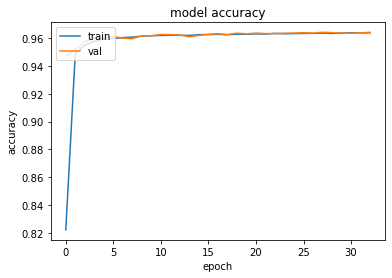

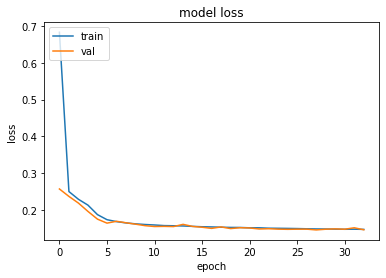

124233/124233 [==============================] - 3s 23us/sample - loss: 0.1467 - accuracy: 0.9642
0.14671952791924203 0.9641883


In [23]:
# import packages
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint

# save best model checkpoint
#callbacks = ModelCheckpoint(save_best_only=True)

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.9, epsilon=0.001)
# Code starts here
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

early_stop = EarlyStopping(patience=5,monitor='val_loss',restore_best_weights=True)

history = model.fit(X_train,y_train,batch_size = 500,validation_split = 0.2,epochs=50,callbacks=[early_stop])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

test_loss,test_acc = model.evaluate(X_val,y_val)
print(test_loss,test_acc)
# Code ends here

In [24]:
# import libraries 
# from keras import models
# from keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,BatchNormalization
# code starts here

model = Sequential()
model.add(Dense(64,input_shape = (X_train.shape[1],),kernel_initializer="uniform",bias_initializer='zeros',kernel_regularizer=regularizers.l2(0.09)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(80,kernel_initializer="uniform",bias_initializer='zeros',kernel_regularizer=regularizers.l1(0.09)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(76,kernel_initializer="uniform",bias_initializer='zeros',kernel_regularizer=regularizers.l1(0.09)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(96,kernel_initializer="uniform",bias_initializer='zeros',kernel_regularizer=regularizers.l1(0.09)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(120,kernel_initializer="uniform",bias_initializer='zeros',kernel_regularizer=regularizers.l2(0.09)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(10,kernel_initializer="uniform",bias_initializer='zeros',kernel_regularizer=regularizers.l1(0.09)))
model.add(Activation('softmax'))

model.summary()

# code ends here


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                5120      
_________________________________________________________________
activation_12 (Activation)   (None, 64)                0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 64)                256       
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 80)                5200      
_________________________________________________________________
activation_13 (Activation)   (None, 80)                0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 80)               

Train on 397545 samples, validate on 99387 samples
Epoch 1/5
397545/397545 [==============================] - 8s 21us/sample - loss: 3.5537 - accuracy: 0.8462 - val_loss: 2.1426 - val_accuracy: 0.7785
Epoch 2/5
397545/397545 [==============================] - 7s 17us/sample - loss: 1.7671 - accuracy: 0.8695 - val_loss: 1.6333 - val_accuracy: 0.8865
Epoch 3/5
397545/397545 [==============================] - 7s 17us/sample - loss: 1.6508 - accuracy: 0.8657 - val_loss: 1.6490 - val_accuracy: 0.8522
Epoch 4/5
397545/397545 [==============================] - 7s 17us/sample - loss: 1.6059 - accuracy: 0.8652 - val_loss: 1.6472 - val_accuracy: 0.8218
Epoch 5/5
397545/397545 [==============================] - 7s 17us/sample - loss: 1.5759 - accuracy: 0.8659 - val_loss: 1.5346 - val_accuracy: 0.8760


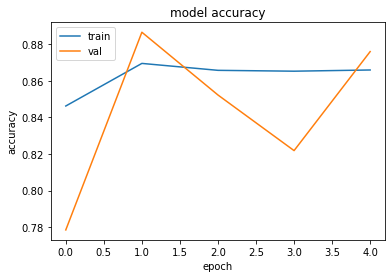

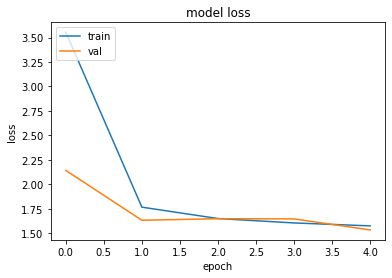

124233/124233 [==============================] - 4s 33us/sample - loss: 1.5340 - accuracy: 0.8764
1.5340372868752514 0.8764338


In [25]:
# import packages
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint

# save best model checkpoint
#callbacks = ModelCheckpoint(save_best_only=True)

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.9, epsilon=0.001)
# Code starts here
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

early_stop = EarlyStopping(patience=5,monitor='val_loss',restore_best_weights=True)

history = model.fit(X_train,y_train,batch_size = 500,validation_split = 0.2,epochs=5,callbacks=[early_stop])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

test_loss,test_acc = model.evaluate(X_val,y_val)
print(test_loss,test_acc)
# Code ends here